<a href="https://colab.research.google.com/github/sreejagundu/Vehicle_Detection_using_yolov5/blob/main/car_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [33]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [34]:
!kaggle kernels pull anupriyagupta1/object-detection-using-yolo-v5

Source code downloaded to /content/object-detection-using-yolo-v5.ipynb


In [35]:
!kaggle datasets download -d sshikamaru/car-object-detection

car-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
import zipfile
zip_ref = zipfile.ZipFile('/content/car-object-detection.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Clone repository from github.com
!git clone https://github.com/ultralytics/yolov5

In [38]:
#installing pycocotools
# -q flag is used to run the installation process in quiet mode

!pip install -q -U pycocotools

In [39]:
# add -q to quit long outputs
!pip install -q -r yolov5/requirements.txt                 #install dependencies
!cp yolov5/requirements.txt ./                             #copy file to current directory

In [40]:
img_h, img_w, num_channels = (380,676,3)         #num_channels-no. of colors in image(1-Grey, 3-color img RedGreenBlue,4RGBA)
df = pd.read_csv('/content/data/train_solution_bounding_boxes (1).csv')
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [41]:
df.rename(columns={'image':'image_id'}, inplace=True)              #rename column image to image_ID
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])   #removes file extension from image_id
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [42]:
index = list(set(df.image_id))              #create unique image ID as set removes duplicate values
image = random.choice(index)
print("Image ID: %s"%(image))

Image ID: vid_4_9080


In [43]:
img = cv2.imread(f'/content/data/training_images/{image}.jpg')
img.shape

(380, 676, 3)

Image ID: vid_4_21180


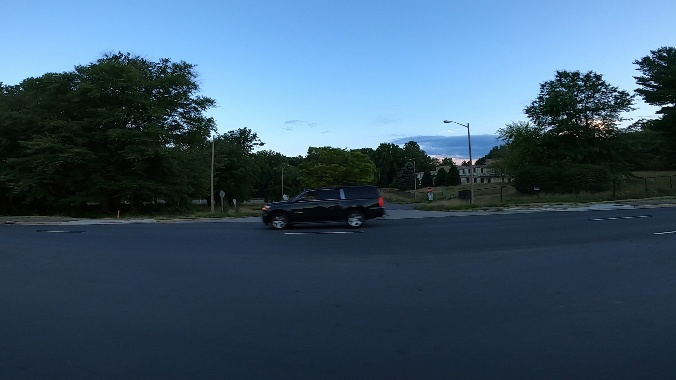

In [44]:
image = random.choice(index)
print("Image ID: %s"%(image))
Image(filename=f'/content/data/training_images/{image}.jpg',width=800)

In [45]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /content/data/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=/content/data/testing_images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /content/data/testing_images/vid_5_25100.jpg: 416x704 (no detections), 619.0ms
image 2/175 /content/data/testing_images/vid_5_25120.jpg: 416x704 (no detections), 568.8ms
image 3/175 /content/data/testing_images/vid_5_25140.jpg: 416x704 (no 

In [46]:
predicted_files = []

for (dirpath, dirnames, filenames) in os.walk("/content/yolov5/runs/detect/exp2"):
    predicted_files.extend(filenames)
    dirnames.extend(dirnames)

print("Names of 5 predicted images")
predicted_files[:5]

Names of 5 predicted images


['vid_5_29880.jpg',
 'vid_5_28660.jpg',
 'vid_5_26560.jpg',
 'vid_5_27560.jpg',
 'vid_5_30840.jpg']

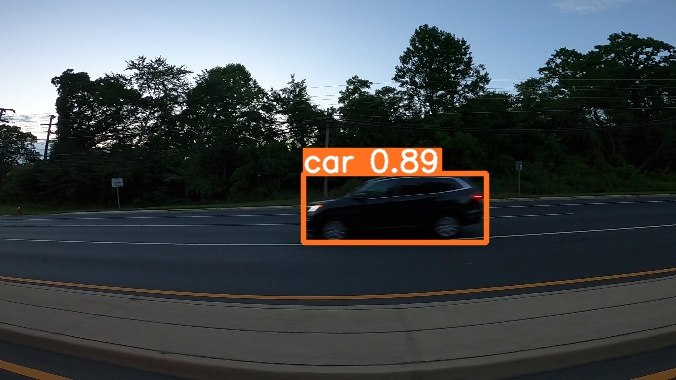

In [47]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

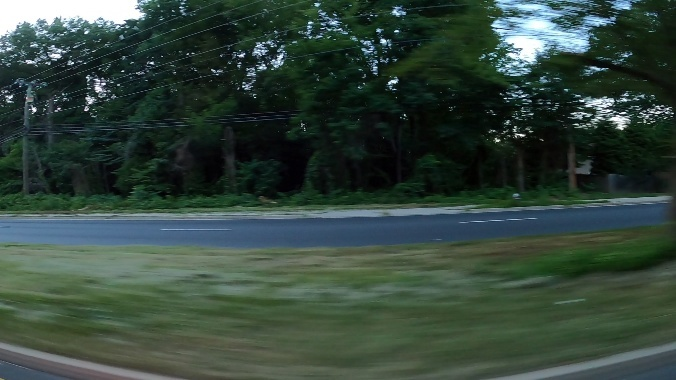

In [48]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

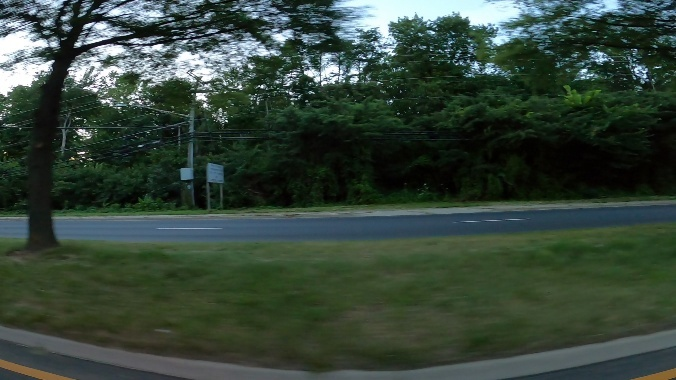

In [49]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

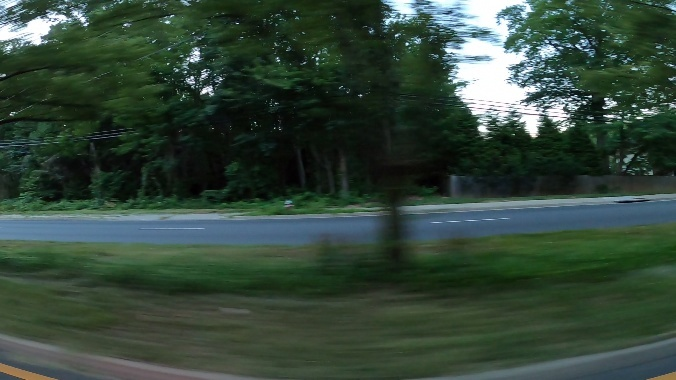

In [50]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

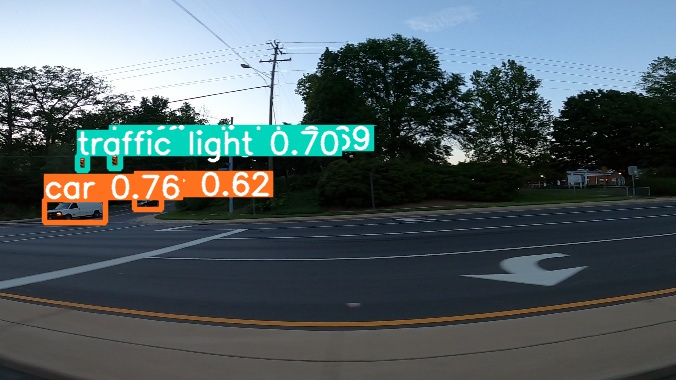

In [51]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

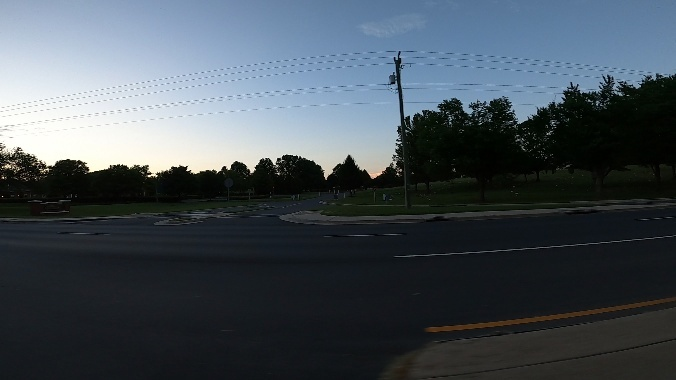

In [52]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

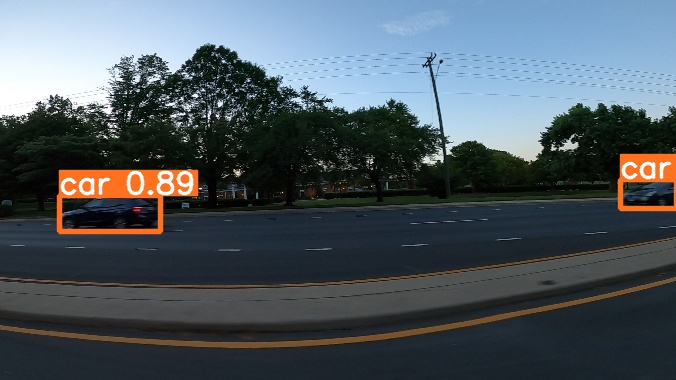

In [53]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

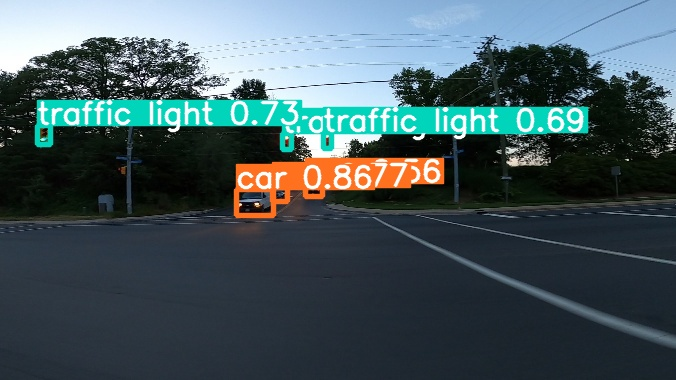

In [54]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

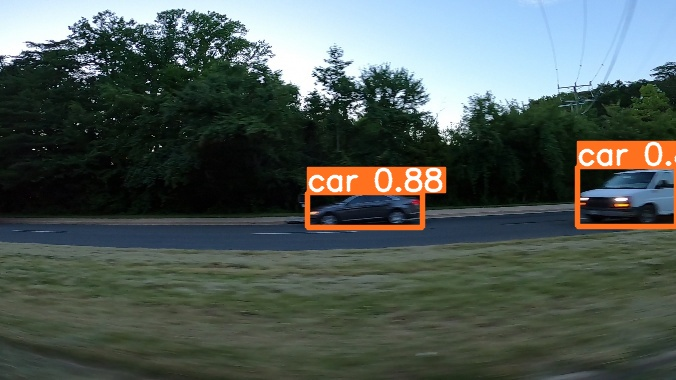

In [55]:
Image(filename = f'/content/yolov5/runs/detect/exp2/{random.choice(predicted_files)}',width=800)

In [56]:
!rm -rf runs yolov5